In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os

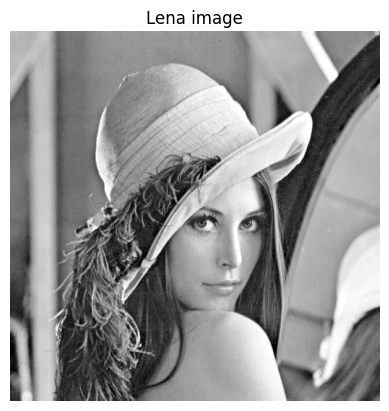

In [3]:
# 1.
lena = cv2.imread("images_lab2/lena.png", cv2.IMREAD_GRAYSCALE)
#gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

#cv2.imshow("Gray", gray)
#cv2.waitKey()

plt.imshow(lena, cmap='gray')
plt.title('Lena image')
plt.axis('off')
plt.show()


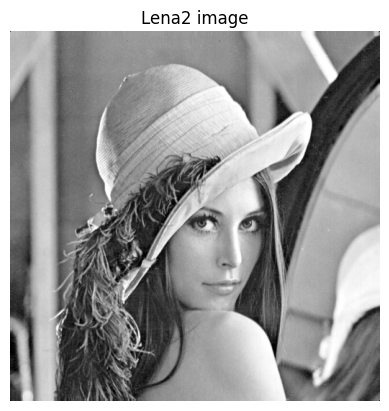

In [37]:
# 2.
lena2 = np.zeros((514,514), dtype=np.uint8)

lena2[1:513, 1:513] = lena

lena2[0, 1:513] = lena[0, :]
lena2[513, 1:513] = lena[511, :]
lena2[1:513, 0] = lena[:, 0]
lena2[1:513, 513] = lena[:, 511]

plt.imshow(lena2, cmap = 'gray')
plt.title('Lena2 image')
plt.axis('off')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_20508\1577305317.py:7: RuntimeWarning: overflow encountered in scalar subtract
  hor_div[i, j] = lena2[i, j+1] - lena2[i, j]
C:\Users\USER\AppData\Local\Temp\ipykernel_20508\1577305317.py:8: RuntimeWarning: overflow encountered in scalar subtract
  ver_div[i, j] = lena2[i+1, j] - lena2[i, j]


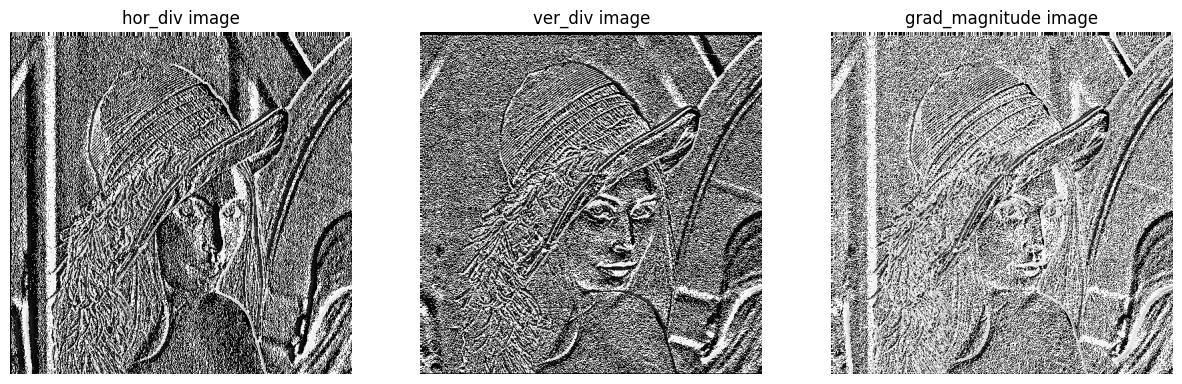

In [35]:
# 3.
hor_div = np.zeros((512, 512), dtype=np.uint16)
ver_div = np.zeros((512, 512), dtype=np.uint16)

for i in range(512):
    for j in range(512):
        hor_div[i, j] = lena2[i, j+1] - lena2[i, j]
        ver_div[i, j] = lena2[i+1, j] - lena2[i, j]

grad_magnitude = np.sqrt(hor_div**2+ver_div**2).astype(np.uint8)

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(hor_div, cmap='gray')
plt.title('hor_div image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ver_div, cmap='gray')
plt.title('ver_div image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(grad_magnitude, cmap='gray')
plt.title('grad_magnitude image')
plt.axis('off')

plt.show()

In [5]:
# 4.
output_video_path = 'segmented_video.mp4'
fps = 2
frame_size = (512, 512)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

for threshold in range(10, 241, 10):
    # Tạo ảnh biên nhị phân
    binary = np.zeros_like(grad_magnitude)
    binary[grad_magnitude > threshold] = 255
    
    frame = cv2.cvtColor(binary.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    
    # Thêm text hiển thị giá trị threshold
    cv2.putText(frame, f'Threshold: {threshold}', (20,40), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    video_writer.write(frame)

video_writer.release()

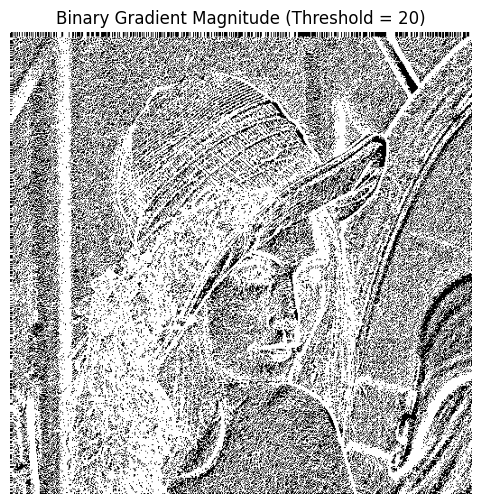

In [ ]:
# 5.
threshold = 20

# Tạo ảnh biên nhị phân
bin_grad_magnitude = np.where(grad_magnitude > threshold, 255, 0).astype(np.uint8)

# Hiển thị ảnh biên nhị phân
plt.figure(figsize=(8, 6))
plt.imshow(bin_grad_magnitude, cmap='gray')
plt.title(f'Binary Gradient Magnitude (Threshold = {threshold})')
plt.axis('off')
plt.show()

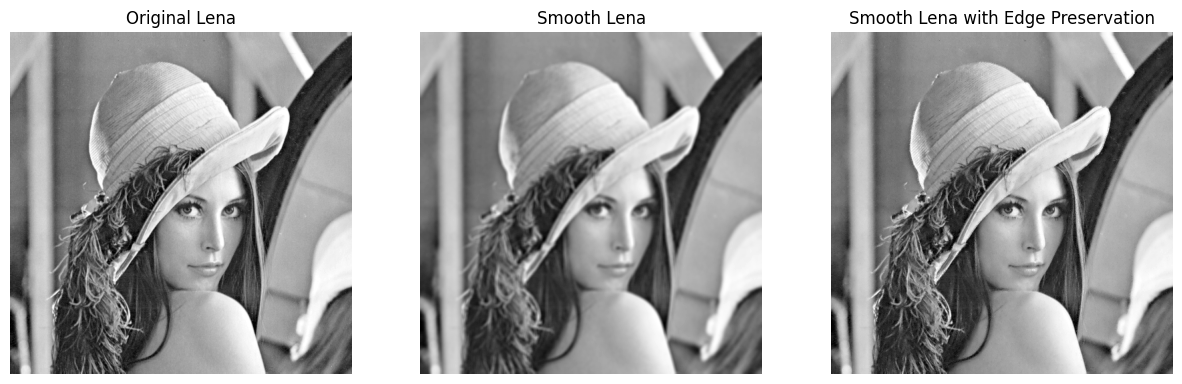

In [7]:
# 6.
smooth_lena = cv2.GaussianBlur(lena, (5, 5), 100)
smooth_lena_with_edge_preservation = np.where(bin_grad_magnitude == 255, lena, smooth_lena)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(lena, cmap='gray')
plt.title('Original Lena')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(smooth_lena, cmap='gray')
plt.title('Smooth Lena')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(smooth_lena_with_edge_preservation, cmap='gray')
plt.title('Smooth Lena with Edge Preservation')
plt.axis('off')

plt.show()

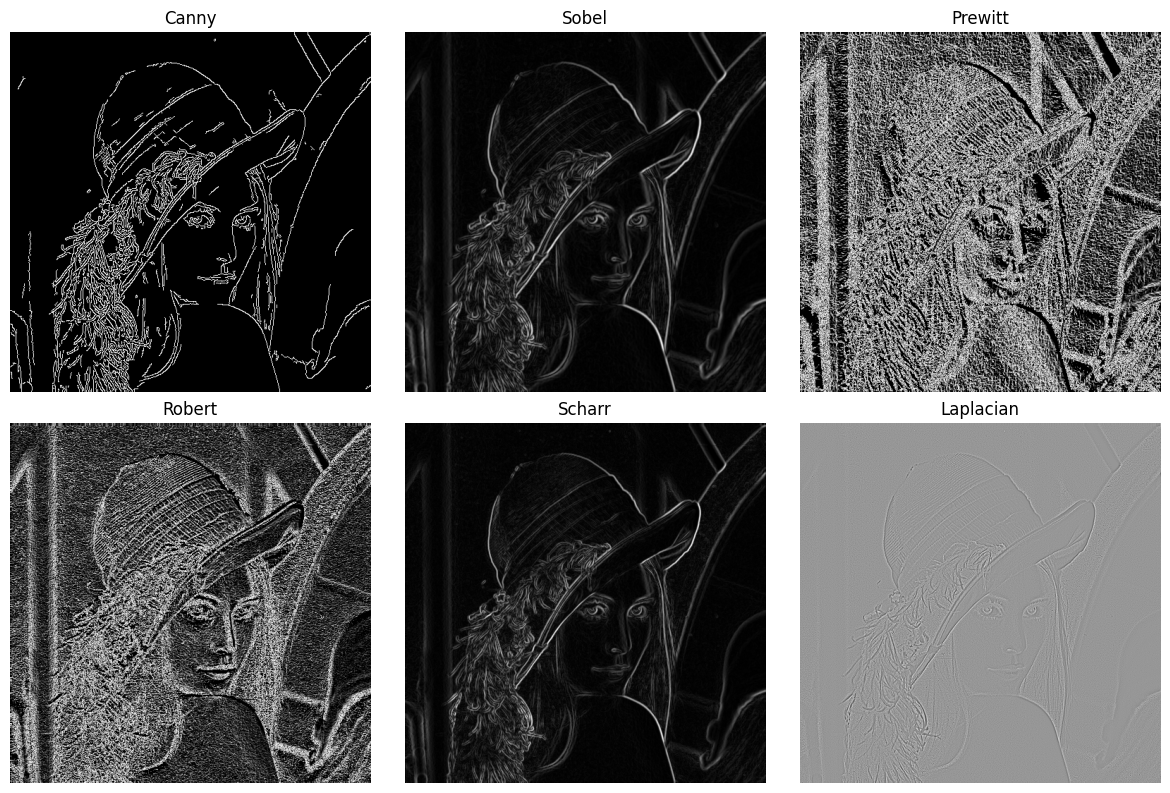

In [5]:
# 7.3
edges_canny = cv2.Canny(lena, 100, 200)

sobel_Hor_div = cv2.Sobel(lena, cv2.CV_64F, 1, 0, ksize=5)
sobel_Ver_div = cv2.Sobel(lena, cv2.CV_64F, 0, 1, ksize=5)
sobel_magnitude = np.sqrt(sobel_Hor_div**2 + sobel_Ver_div**2)

prewitt_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewitt_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_x_result = cv2.filter2D(lena, -1, prewitt_x)
prewitt_y_result = cv2.filter2D(lena, -1, prewitt_y)
prewitt_magnitude = np.sqrt(prewitt_x_result**2 + prewitt_y_result**2)

robert_x = np.array([[1, 0], [0, -1]])
robert_y = np.array([[0, 1], [-1, 0]])
robert_x_result = cv2.filter2D(lena, -1, robert_x)
robert_y_result = cv2.filter2D(lena, -1, robert_y)
robert_magnitude = np.sqrt(robert_x_result**2 + robert_y_result**2)

scharr_x = cv2.Scharr(lena, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(lena, cv2.CV_64F, 0, 1)
scharr_magnitude = np.sqrt(scharr_x**2 + scharr_y**2)

laplacian = cv2.Laplacian(lena, cv2.CV_64F)
laplacian_magnitude = np.abs(laplacian)

# Hiển thị các kết quả
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title('Canny')
plt.imshow(edges_canny, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Sobel')
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Prewitt')
plt.imshow(prewitt_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Robert')
plt.imshow(robert_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Scharr')
plt.imshow(scharr_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Laplacian')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
def binary_segment(img, threshold):
    new_img = np.zeros(img.shape, dtype= img.dtype)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > threshold:
                new_img[i,j] = 255
    return new_img

In [27]:
# 7.4.1
output_video_path = 'canny_segmented_video.mp4'
fps = 2
frame_size = (512, 512)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

for threshold in range(10, 241, 10):
    # Tạo ảnh biên nhị phân
    threshold1 = threshold
    threshold2 = threshold
    canny_magnitude = cv2.Canny(lena, threshold1, threshold2)
    canny_binary = np.zeros_like(canny_magnitude)
    canny_binary[canny_magnitude > threshold] = 255
    
    # Chuyển sang BGR để ghi video
    frame = cv2.cvtColor(canny_binary.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    
    # Thêm text hiển thị giá trị threshold
    cv2.putText(frame, f'Threshold: {threshold}', (20,40), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    video_writer.write(frame)

video_writer.release()

In [10]:
# 7.4.2
output_video_path = 'sobel_segmented_video.mp4'
fps = 2
frame_size = (512, 512)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

for threshold in range(10, 241, 10):
    # Tạo ảnh biên nhị phân
    sobel_binary = np.zeros_like(sobel_magnitude)
    sobel_binary[sobel_magnitude > threshold] = 255
    
    # Chuyển sang BGR để ghi video
    frame = cv2.cvtColor(sobel_binary.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    
    # Thêm text hiển thị giá trị threshold
    cv2.putText(frame, f'Threshold: {threshold}', (20,40), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    video_writer.write(frame)

video_writer.release()

In [8]:
# 7.4.3
output_video_path = 'prewitt_segmented_video.mp4'
fps = 2
frame_size = (512, 512)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

for threshold in range(10, 241, 10):
    # Tạo ảnh biên nhị phân
    # prewitt_binary = np.zeros_like(prewitt_magnitude)
    # prewitt_binary[prewitt_magnitude > threshold] = 255
    
    # Chuyển sang BGR để ghi video
    frame = cv2.cvtColor(binary_segment(prewitt_magnitude, threshold).astype(np.uint8), cv2.COLOR_GRAY2RGB)

    # Thêm text hiển thị giá trị threshold
    cv2.putText(frame, f'Threshold: {threshold}', (20,40), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    video_writer.write(frame)

video_writer.release()

In [12]:
# 7.4.4
output_video_path = 'robert_segmented_video.mp4'
fps = 2
frame_size = (512, 512)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

for threshold in range(10, 241, 10):
    # Tạo ảnh biên nhị phân
    robert_binary = np.zeros_like(robert_magnitude)
    robert_binary[robert_magnitude > threshold] = 255
    
    # Chuyển sang BGR để ghi video
    frame = cv2.cvtColor(robert_binary.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    
    # Thêm text hiển thị giá trị threshold
    cv2.putText(frame, f'Threshold: {threshold}', (20,40), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    
    # Ghi frame vào video
    video_writer.write(frame)

video_writer.release()

In [13]:
# 7.4.5
output_video_path = 'scharr_segmented_video.mp4'
fps = 2
frame_size = (512, 512)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

for threshold in range(10, 241, 10):
    # Tạo ảnh biên nhị phân
    scharr_binary = np.zeros_like(scharr_magnitude)
    scharr_binary[scharr_magnitude > threshold] = 255
    
    # Chuyển sang BGR để ghi video
    frame = cv2.cvtColor(scharr_binary.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    
    # Thêm text hiển thị giá trị threshold
    cv2.putText(frame, f'Threshold: {threshold}', (20,40), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    
    # Ghi frame vào video
    video_writer.write(frame)

video_writer.release()

In [14]:
# 7.4.6
output_video_path = 'laplacian_segmented_video.mp4'
fps = 2
frame_size = (512, 512)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

for threshold in range(10, 241, 10):
    # Tạo ảnh biên nhị phân
    laplacian_binary = np.zeros_like(laplacian_magnitude)
    laplacian_binary[laplacian_magnitude > threshold] = 255
    
    # Chuyển sang BGR để ghi video
    frame = cv2.cvtColor(laplacian_binary.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    
    # Thêm text hiển thị giá trị threshold
    cv2.putText(frame, f'Threshold: {threshold}', (20,40), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    
    # Ghi frame vào video
    video_writer.write(frame)

video_writer.release()

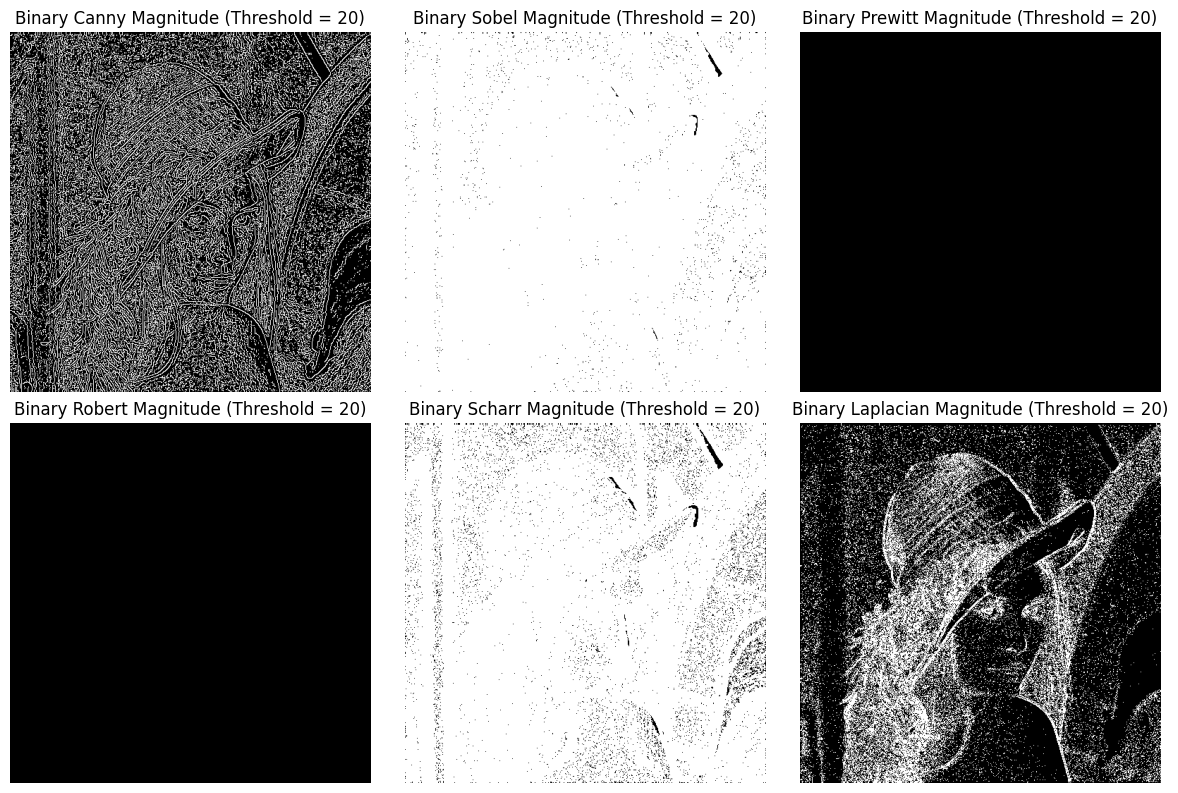

In [9]:
# 7.5
threshold = 20

# Tạo ảnh biên nhị phân
bin_canny_magnitude = np.where(cv2.Canny(lena, 20, 20) > threshold, 255, 0).astype(np.uint8)
bin_sobel_magnitude = np.where(sobel_magnitude > threshold, 255, 0).astype(np.uint8)
bin_prewitt_magnitude = np.where(prewitt_magnitude > threshold, 255, 0).astype(np.uint8)
bin_robert_magnitude = np.where(robert_magnitude > threshold, 255, 0).astype(np.uint8)
bin_scharr_magnitude = np.where(scharr_magnitude > threshold, 255, 0).astype(np.uint8)
bin_laplacian_magnitude = np.where(laplacian_magnitude > threshold, 255, 0).astype(np.uint8)

# Hiển thị ảnh biên nhị phân
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(bin_canny_magnitude, cmap='gray')
plt.title(f'Binary Canny Magnitude (Threshold = {threshold})')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(bin_sobel_magnitude, cmap='gray')
plt.title(f'Binary Sobel Magnitude (Threshold = {threshold})')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(bin_prewitt_magnitude, cmap='gray')
plt.title(f'Binary Prewitt Magnitude (Threshold = {threshold})')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(bin_robert_magnitude, cmap='gray')
plt.title(f'Binary Robert Magnitude (Threshold = {threshold})')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(bin_scharr_magnitude, cmap='gray')
plt.title(f'Binary Scharr Magnitude (Threshold = {threshold})')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(bin_laplacian_magnitude, cmap='gray')
plt.title(f'Binary Laplacian Magnitude (Threshold = {threshold})')
plt.axis('off')

plt.tight_layout()
plt.show()

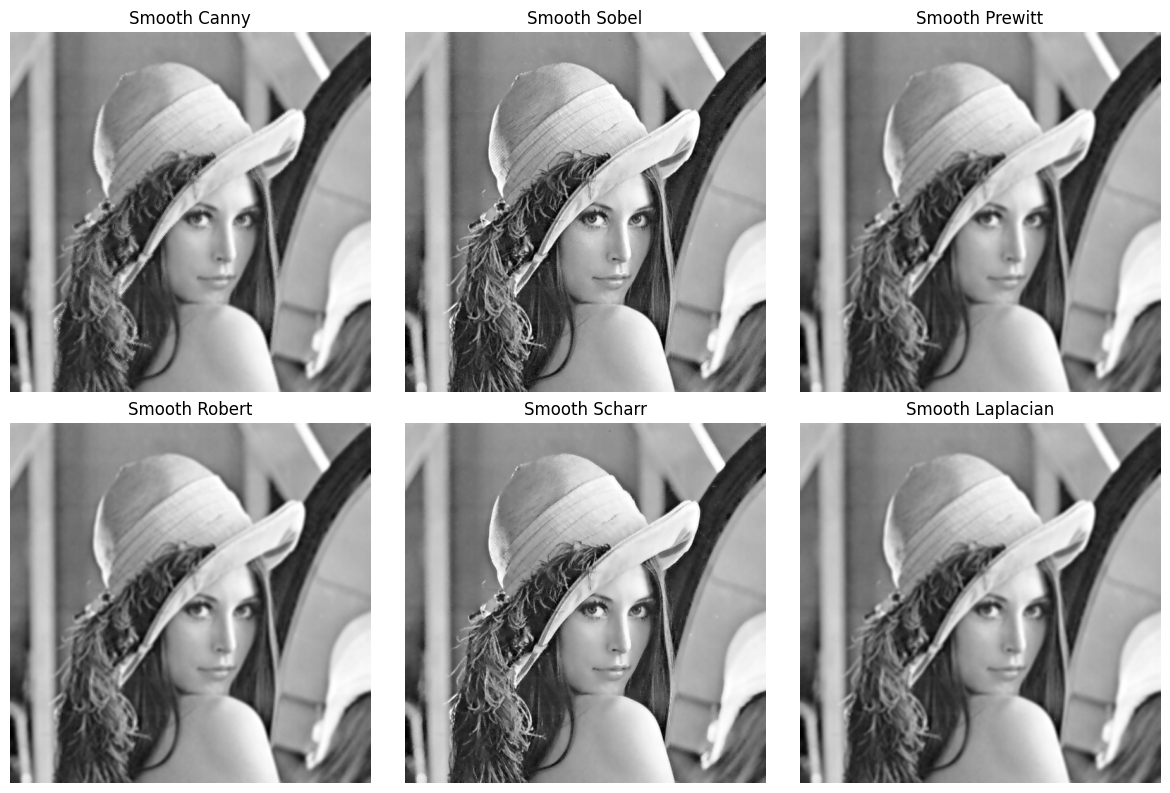

In [17]:
# 7.6
# Hàm làm mượt với bảo tồn biên
def smooth_with_edge_preservation(image, binary_edge):
    smooth_image = cv2.GaussianBlur(image, (5, 5), 100)
    preserved_image = np.where(binary_edge == 255, image, smooth_image)
    return preserved_image

# Áp dụng cho từng toán tử
smooth_canny = smooth_with_edge_preservation(lena, canny_binary)
smooth_sobel = smooth_with_edge_preservation(lena, sobel_binary)
smooth_prewitt = smooth_with_edge_preservation(lena, prewitt_binary)
smooth_robert = smooth_with_edge_preservation(lena, robert_binary)
smooth_scharr = smooth_with_edge_preservation(lena, scharr_binary)
smooth_laplacian = smooth_with_edge_preservation(lena, laplacian_binary)

# Hiển thị kết quả
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title('Smooth Canny')
plt.axis('off')
plt.imshow(smooth_canny, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Smooth Sobel')
plt.axis('off')
plt.imshow(smooth_sobel, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Smooth Prewitt')
plt.axis('off')
plt.imshow(smooth_prewitt, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Smooth Robert')
plt.axis('off')
plt.imshow(smooth_robert, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Smooth Scharr')
plt.axis('off')
plt.imshow(smooth_scharr, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('Smooth Laplacian')
plt.axis('off')
plt.imshow(smooth_laplacian, cmap='gray')

plt.tight_layout()
plt.show()

In [4]:
# 8. 
def apply_edge_detection(img, method='sobel'):
    if method == 'canny':
        edges = cv2.Canny(img, 100, 200)
    elif method == 'sobel':
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        edges = np.sqrt(sobelx**2 + sobely**2)
    elif method == 'prewitt':
        kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
        kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        img_prewittx = cv2.filter2D(img, -1, kernelx)
        img_prewitty = cv2.filter2D(img, -1, kernely)
        edges = np.sqrt(img_prewittx**2 + img_prewitty**2)
    elif method == 'roberts':
        roberts_cross_v = np.array([[1, 0], [0, -1]])
        roberts_cross_h = np.array([[0, 1], [-1, 0]])
        vertical = cv2.filter2D(img, -1, roberts_cross_v)
        horizontal = cv2.filter2D(img, -1, roberts_cross_h)
        edges = np.sqrt(vertical**2 + horizontal**2)
    elif method == 'scharr':
        scharrx = cv2.Scharr(img, cv2.CV_64F, 1, 0)
        scharry = cv2.Scharr(img, cv2.CV_64F, 0, 1)
        edges = np.sqrt(scharrx**2 + scharry**2)
    elif method == 'laplacian':
        edges = np.abs(cv2.Laplacian(img, cv2.CV_64F))
    
    return edges

methods = ['canny', 'sobel', 'prewitt', 'roberts', 'scharr', 'laplacian']

for i, method in enumerate(methods, 1):
    edges = apply_edge_detection(lena, method)
    
execution_times = {}

for method in methods:
    start_time = time.time()
    # Chạy 100 lần để có kết quả chính xác hơn
    for _ in range(100):
        _ = apply_edge_detection(lena, method)
    execution_times[method] = (time.time() - start_time) / 100

for method, exec_time in execution_times.items():
    print(f"{method.capitalize()}: {exec_time*1000:.2f} ms")

Canny: 1.34 ms
Sobel: 4.73 ms
Prewitt: 6.78 ms
Roberts: 5.22 ms
Scharr: 3.85 ms
Laplacian: 1.70 ms


In [20]:
# 9.
def check_connectivity(image):
    # Tìm các thành phần liên thông
    num_labels, labels = cv2.connectedComponents((image == 0).astype(np.uint8))
    
    # Đếm số pixel trong mỗi thành phần
    unique, counts = np.unique(labels[labels > 0], return_counts=True)
    
    # Nếu chỉ có 1 thành phần và có kích thước lớn hơn 1 pixel
    return len(unique) == 1 and counts[0] > 1

connected_img = cv2.imread('images_lab2/connected.png', cv2.IMREAD_GRAYSCALE)
unconnected_img = cv2.imread('images_lab2/unconnected.png', cv2.IMREAD_GRAYSCALE)

print("Connected image is connected:", check_connectivity(connected_img))
print("Unconnected image is connected:", check_connectivity(unconnected_img))

Connected image is connected: True
Unconnected image is connected: False
